In [1]:
from pydataset import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
df = data("tips")
df

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


## One Sample T-Test Example (compare a subgroup to the population)
- Business Question - are tips on Sunday significantly different than the rest of the week?
- The null hypothesis is that there is no difference. Tips are the same on Sunday vs. The entire Week
- The alternative hypothesis is that there IS a difference between Sunday tips and the entire week

In [3]:
null_hypothesis = "Sunday tips are the same as the rest of the week"
alternative_hyothesis = "Sunday tips are different than the rest of the week's"
confidence_level = .95
alpha = 1 - confidence_level

In [4]:
# Make a subgroup for Sunday
sunday = df[df.day == "Sun"]
sunday.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:>

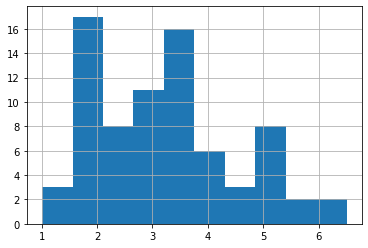

In [5]:
# Let's take a peek at the Sunday tips
sunday.tip.hist()

<AxesSubplot:>

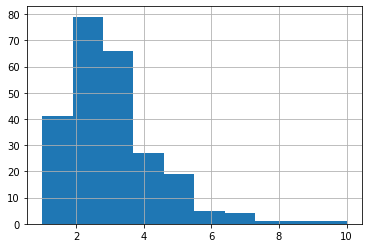

In [6]:
df.tip.hist()

In [7]:
# If you are doing a one-sample test, use the ttest_1samp function
t, p = stats.ttest_1samp(sunday.tip, df.tip.mean())
p

0.07378840524522642

In [8]:
alpha

0.050000000000000044

In [9]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternative hypothesis that", alternative_hyothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Failing to reject the null != 'accepting the null'")

We fail to reject the null hypothesis
Failing to reject the null != 'accepting the null'
